# Reading dataset
Original dataset from UCI

In [1]:
import pandas as pd
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')

data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
len(data)

299

In [2]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

# Input and output

In [2]:
input_data=data.drop(columns=['DEATH_EVENT'])
output_data=data['DEATH_EVENT']

# Input data

In [3]:
input_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


# Output data

In [6]:
output_data.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

# Split data set into (train-validation-test)

In [4]:
from sklearn.model_selection import train_test_split
x,x_test, y,y_test=train_test_split(input_data,output_data,test_size=0.30,random_state=0)
x_train,x_val, y_train,y_val=train_test_split(x,y,test_size=0.30,random_state=0)

In [5]:
print(x_train.shape)
print(y_train.shape)
print('---------------------')
print(x_val.shape)
print(y_val.shape)
print('---------------------')
print(x_test.shape)
print(y_test.shape)

(146, 12)
(146,)
---------------------
(63, 12)
(63,)
---------------------
(90, 12)
(90,)


# Feature scaling (Normalization)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_val_scaled=scaler.transform(x_val)
x_test_scaled=scaler.transform(x_test)

## Represent scaled data in data fram

In [7]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_val_scaled = pd.DataFrame(x_val_scaled, columns = x_val.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
x_train_scaled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.148148,1.0,0.071319,1.0,0.854167,0.0,0.075039,0.147727,0.25000,0.0,0.0,0.039855
1,0.444444,0.0,0.015310,0.0,0.229167,0.0,0.267790,0.204545,0.68750,1.0,0.0,0.760870
2,0.777778,0.0,0.005996,1.0,0.333333,0.0,0.212026,0.068182,0.59375,1.0,1.0,0.079710
3,0.370370,1.0,0.288084,1.0,0.541667,0.0,0.312644,0.045455,0.87500,0.0,0.0,0.663043
4,0.648148,0.0,0.071319,1.0,0.333333,1.0,0.288833,0.139773,0.65625,0.0,0.0,0.068841


In [9]:
from sklearn.metrics import accuracy_score
def evaluate_model(clf, x_train, y_train, x_val, y_val):   
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    print(clf.__class__.__name__) # function print the name of object class 
    print("Accuracy of training: ", acc_train)
    print("Accuracy of validation: ", acc_val)
    print("-------------")
    return acc_train, acc_val

# Support Vector Machine


In [8]:
from sklearn.svm import SVC

# RBF SVM

In [16]:
rbf_svc_clf=SVC(kernel='rbf',gamma=0.01,random_state=1,C=100)

acc_train_rbf_svm, acc_val_rbf_svm  = evaluate_model(rbf_svc_clf,x_train_scaled,y_train,x_val_scaled,y_val)

SVC
Accuracy of training:  0.8561643835616438
Accuracy of validation:  0.6984126984126984
-------------


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(random_state=1)

acc_train_log, acc_val_log= evaluate_model(logistic_clf,x_train_scaled,y_train,x_val_scaled,y_val)

LogisticRegression
Accuracy of training:  0.8835616438356164
Accuracy of validation:  0.7301587301587301
-------------


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=1, random_state=100)

acc_train_rf, acc_val_rf = evaluate_model(rf_clf,x_train_scaled,y_train,x_val_scaled,y_val)

RandomForestClassifier
Accuracy of training:  0.8013698630136986
Accuracy of validation:  0.7777777777777778
-------------


# Comparing Results

In [26]:
all_results = {
    'Model': [],
    'Train Accuracy': [],
    'Validation Accuracy': [],
}

all_results['Model'] = [ 'Random Forest', 'Linear SVC' , 'RBF SVC']

all_results['Train Accuracy'] = [ acc_train_rf,
                            acc_train_log,                         
                            acc_train_rbf_svm]

all_results['Validation Accuracy'] =[ acc_val_rf,
                          acc_val_log,            
                          acc_val_rbf_svm]


In [28]:
all_results_df =pd.DataFrame(all_results)
all_results_df.sort_values(by='Validation Accuracy', ascending=False, ignore_index=True, inplace=True)
all_results_df

,Model,Train Accuracy,Validation Accuracy
0,Random Forest,0.801370,0.777778
1,Linear SVC,0.883562,0.730159
2,RBF SVC,0.856164,0.698413


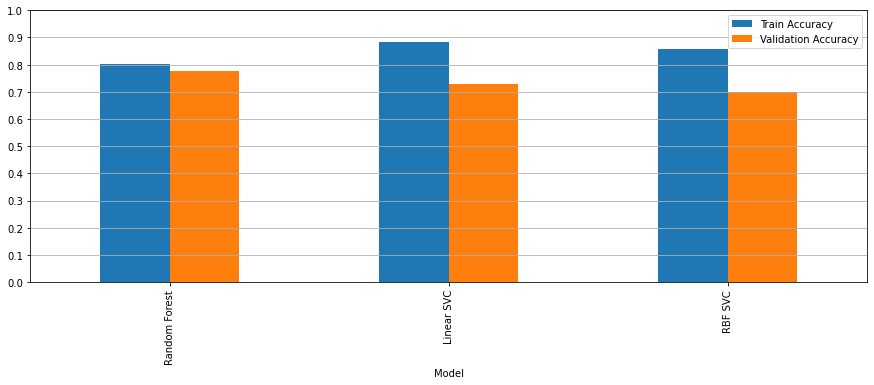

In [30]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

all_results_df.plot.bar(x='Model', y=['Train Accuracy', 'Validation Accuracy'], figsize=(15,5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

# The Best Model

In [31]:
best_model= RandomForestClassifier(n_estimators=1000, max_depth=1, random_state=100)
best_model.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=1, n_estimators=1000, random_state=100)

# Testing

In [32]:
y_pred_test=best_model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred_test))

0.7666666666666667
